# 6. Particles: Projections

## Load The Data

In [1]:
using Mera
info = getinfo(400, "../../testing/simulations/manu_sim_sf_L14");
particles  = getparticles(info); 

┌ Info: Precompiling Mera [02f895e8-fdb1-4346-8fe6-c721699f5126]
└ @ Base loading.jl:1273



*__   __ _______ ______   _______ 
|  |_|  |       |    _ | |   _   |
|       |    ___|   | || |  |_|  |
|       |   |___|   |_||_|       |
|       |    ___|    __  |       |
| ||_|| |   |___|   |  | |   _   |
|_|   |_|_______|___|  |_|__| |__|

[Mera]: 2020-02-12T17:38:24.846

Code: RAMSES
output [400] summary:
mtime: 2018-09-05T09:51:55.041
ctime: 2019-11-01T17:35:21.051
simulation time: 594.98 [Myr]
boxlen: 48.0 [kpc]
ncpu: 2048
ndim: 3
-------------------------------------------------------
amr:           true
level(s): 6 - 14 --> cellsize(s): 750.0 [pc] - 2.93 [pc]
-------------------------------------------------------
hydro:         true
hydro-variables:  7  --> (:rho, :vx, :vy, :vz, :p, :var6, :var7)
hydro-descriptor: (:density, :velocity_x, :velocity_y, :velocity_z, :thermal_pressure, :passive_scalar_1, :passive_scalar_2)
γ: 1.6667
-------------------------------------------------------
gravity:       true
gravity-variables: (:epot, :ax, :ay, :az)
----------------------------

Reading data...100%|████████████████████████████████████| Time: 0:00:03


Found 5.089390e+05 particles
Memory used for data table :34.947275161743164 MB
-------------------------------------------------------



In [2]:
particles.data

Table with 508939 rows, 10 columns:
Columns:
#   colname  type
────────────────────
1   level    Int32
2   x        Float64
3   y        Float64
4   z        Float64
5   id       Int32
6   vx       Float64
7   vy       Float64
8   vz       Float64
9   mass     Float64
10  birth    Float64

## Projection of Predefined Quantities

See the possible variables:

In [3]:
projection()

Predefined vars for projections:
------------------------------------------------
=====================[gas]:=====================
       -all the non derived hydro vars-
:cpu, :level, :rho, :cx, :cy, :cz, :vx, :vy, :vz, :p, var6,...
further possibilities: :rho, :density, :ρ
              -derived hydro vars-
:x, :y, :z
:sd or :Σ or :surfacedensity
:mass, :cellsize, :freefall_time
:cs, :mach, :jeanslength, :jeansnumber

==================[particles]:==================
        all the non derived  vars:
:cpu, :level, :id, :family, :tag 
:x, :y, :z, :vx, :vy, :vz, :mass, :birth, :metal....

              -derived particle vars-
:age

==============[gas or particles]:===============
:v, :ekin
squared => :vx2, :vy2, :vz2
velocity dispersion => σx, σy, σz, σ

related to a given center:
---------------------------
:vr_cylinder, vr_sphere (radial components)
:vϕ_cylinder, :vθ
squared => :vr_cylinder2, :vϕ_cylinder2
velocity dispersion => σr_cylinder, σϕ_cylinder 

2d maps:
:r_cylinder, :r_sph

## Projection of a Single Quantity in Different Directions (z,y,x)

Here we project the surface density in the z-direction of the data within a particular vertical range (domain=[0:1]) on a grid corresponding to level=9. 
Pass any object of *PartDataType* (here: "particles") to the *projection*-function and select a variable by a Symbol (here: :sd = :surfacedensity = :Σ in Msol/pc^3)

In [4]:
proj_z = projection(particles, :sd, unit=:Msol_pc2, lmax=9, zrange=[0.45,0.55])
proj_z = projection(particles, :Σ,  unit=:Msol_pc2, lmax=9, zrange=[0.45,0.55], verbose=false)
proj_z = projection(particles, :surfacedensity, unit=:Msol_pc2, lmax=9,zrange=[0.45,0.55], verbose=false)
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9, zrange=[0.45,0.55], verbose=false) # The keyword "unit" (singular) can be omit if the following order is preserved: data-object, quantity, unit.
proj_x = projection(particles, :sd, :Msol_pc2, lmax=9, direction = :x, zrange=[0.45,0.55], verbose=false); # Project the surface density in x-direction

[Mera]: 2020-01-19T15:00:36.635

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Map data on given lmax: 9
xrange: 1 513
yrange: 1 513
zrange: 231 283
pixel-size: 93.75 [pc]



### Select a Range Related to a Center
See also in the documentation for: load data by selection

In [5]:
cv = (particles.boxlen / 2.) * particles.scale.kpc # provide the box-center in kpc
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9,
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                    center=[cv,cv,cv], range_unit=:kpc);

[Mera]: 2020-01-19T15:00:41.449

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Map data on given lmax: 9
xrange: 150 364
yrange: 150 364
zrange: 235 279
pixel-size: 93.75 [pc]



Use the short notation for the box center :bc or :boxcenter for all dimensions (x,y,z):

In [6]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9,
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:boxcenter], range_unit=:kpc);

[Mera]: 2020-01-19T15:00:42.672

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Map data on given lmax: 9
xrange: 150 364
yrange: 150 364
zrange: 235 279
pixel-size: 93.75 [pc]



In [7]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9,
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:bc], range_unit=:kpc);

[Mera]: 2020-01-19T15:00:42.903

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Map data on given lmax: 9
xrange: 150 364
yrange: 150 364
zrange: 235 279
pixel-size: 93.75 [pc]



Use the box center notation for individual dimensions, here x,z:

In [8]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9, 
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:bc, 24., :bc], range_unit=:kpc);

[Mera]: 2020-01-19T15:00:44.532

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Map data on given lmax: 9
xrange: 150 364
yrange: 150 364
zrange: 235 279
pixel-size: 93.75 [pc]



### Get Multiple Quantities

Get several quantities with one function call by passing an array containing the selected variables (at least one entry). The keyword name for the units is now in plural.

In [9]:
proj1_x = projection(particles, [:sd], units=[:Msol_pc2], lmax=9,
                        direction = :x, 
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2020-01-19T15:00:45.139

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Map data on given lmax: 9
xrange: 150 364
yrange: 150 364
zrange: 235 279
pixel-size: 93.75 [pc]



Pass an array containing several quantities to process and their corresponding units:

In [10]:
proj1_z = projection(particles, [:sd, :vx], units=[:Msol_pc2, :km_s], lmax=9,
                        direction = :x,
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2020-01-19T15:00:45.37

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Map data on given lmax: 9
xrange: 150 364
yrange: 150 364
zrange: 235 279
pixel-size: 93.75 [pc]



The function can be called without any keywords by preserving the following order: dataobject, variables, units

In [11]:
proj1_z = projection(particles, [:sd , :vx], [:Msol_pc2, :km_s], lmax=9,
                        direction = :x,
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2020-01-19T15:00:46.77

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Map data on given lmax: 9
xrange: 150 364
yrange: 150 364
zrange: 235 279
pixel-size: 93.75 [pc]



If all selected variables should be of the same unit use the following arguments: dataobject, array of quantities, unit (no array needed)

In [12]:
projvel_z = projection(particles, [:vx, :vy, :vz], :km_s, lmax=9,
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2020-01-19T15:00:47.421

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Map data on given lmax: 9
xrange: 150 364
yrange: 150 364
zrange: 235 279
pixel-size: 93.75 [pc]



## Function Output

List the fields of the assigned object:

In [13]:
propertynames(proj1_z)

(:maps, :maps_unit, :maps_mode, :lmin, :lmax, :ranges, :extent, :cextent, :ratio, :boxlen, :scale, :info)

The projected 2D maps are stored in a dictionary:

In [14]:
proj1_z.maps

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 2 entries:
  :sd => [1.29223 1.29223 … 1.29223 0.0; 2.58445 1.29223 … 0.0 0.0; … ; 6.46114…
  :vx => [178.738 143.611 … 131.468 NaN; 96.6932 154.086 … NaN NaN; … ; -157.80…

The maps can be accessed by giving the name of the dictionary:

In [15]:
proj1_z.maps[:sd]

214×44 Array{Float64,2}:
  1.29223  1.29223   1.29223  …  0.0      1.29223   1.29223  0.0    
  2.58445  1.29223   2.58445     1.29223  1.29223   0.0      0.0    
  0.0      1.29223   3.87668     1.29223  0.0       1.29223  1.29223
  1.29223  1.29223   2.58445     1.29223  1.29223   0.0      2.58445
  0.0      0.0       1.29223     1.29223  0.0       2.58445  2.58445
  2.58445  2.58445   3.87668  …  0.0      0.0       0.0      1.29223
  0.0      2.58445   0.0         2.58445  0.0       1.29223  1.29223
  1.29223  1.29223   6.46114     3.87668  0.0       1.29223  1.29223
  0.0      1.29223   1.29223     0.0      2.58445   1.29223  0.0    
  1.29223  2.58445   1.29223     5.16891  2.58445   0.0      1.29223
  1.29223  0.0       1.29223  …  0.0      2.58445   0.0      0.0    
  2.58445  2.58445   2.58445     6.46114  0.0       2.58445  0.0    
  2.58445  2.58445   6.46114     1.29223  2.58445   0.0      0.0    
  ⋮                           ⋱  ⋮                                  
  3.87668

The units of the maps are stored in:

In [16]:
proj1_z.maps_unit

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 2 entries:
  :sd => :Msol_pc2
  :vx => :km_s

The following fields are helpful for further calculations or plots.

In [17]:
proj1_z.ranges # normalized to the domain=[0:1]

6-element Array{Float64,1}:
 0.29166666666647767
 0.7083333333328743 
 0.29166666666647767
 0.7083333333328743 
 0.4583333333330363 
 0.5416666666663156 

In [18]:
proj1_z.extent # ranges in code units

4-element Array{Float64,1}:
 13.96875
 34.03125
 21.9375 
 26.0625 

In [19]:
proj1_z.cextent # ranges in code units relative to a given center (by default: box center)

4-element Array{Float64,1}:
 -10.03125
  10.03125
  -2.0625 
   2.0625 

In [20]:
proj1_z.ratio # the ratio between the two ranges

4.863636363636363

## Plot Maps with Python

In [21]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9,
                    zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false) 
proj_x = projection(particles, :sd, :Msol_pc2, lmax=9,
                    zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    direction = :x);

Python functions can be directly called in Julia, which gives the opportunity, e.g. to use the Matplotlib library.

In [2]:
using PyPlot

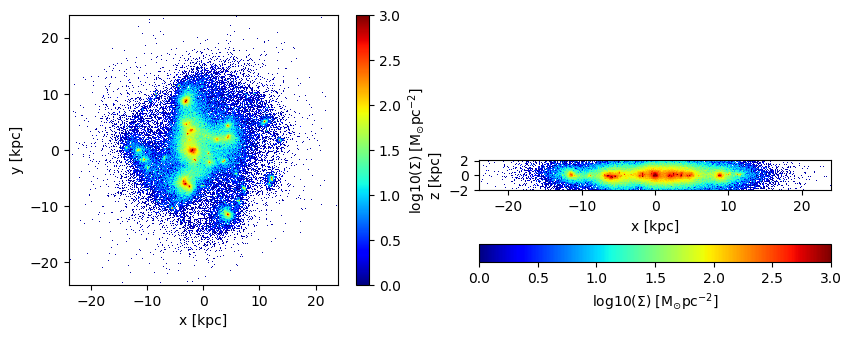

In [23]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);

Project a specific spatial range and plot the axes of the map relative to the box-center (given by keyword: data_center):

In [24]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9, 
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[24.,24.,24.], data_center_unit=:kpc) 
proj_x = projection(particles, :sd, :Msol_pc2, lmax=9,
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[24.,24.,24.], data_center_unit=:kpc, 
                    direction = :x);

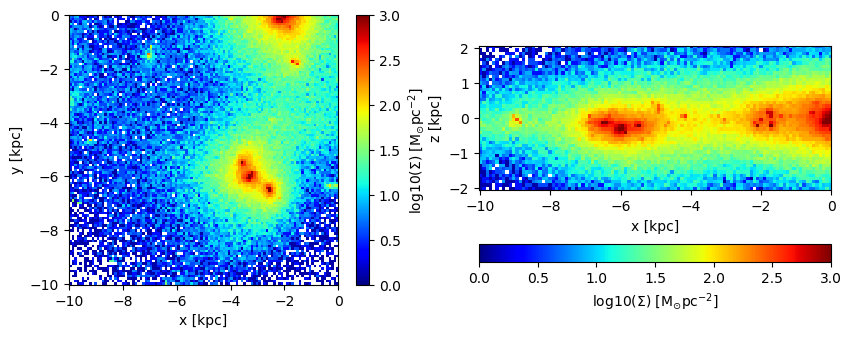

In [25]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);

Plot the axes of the map relative to the map-center (given by keyword: data_center):

In [26]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9,
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[19.,19.,24.], data_center_unit=:kpc) 
proj_x = projection(particles, :sd, :Msol_pc2, lmax=9,
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[19.,19.,24.], data_center_unit=:kpc, 
                    direction = :x);

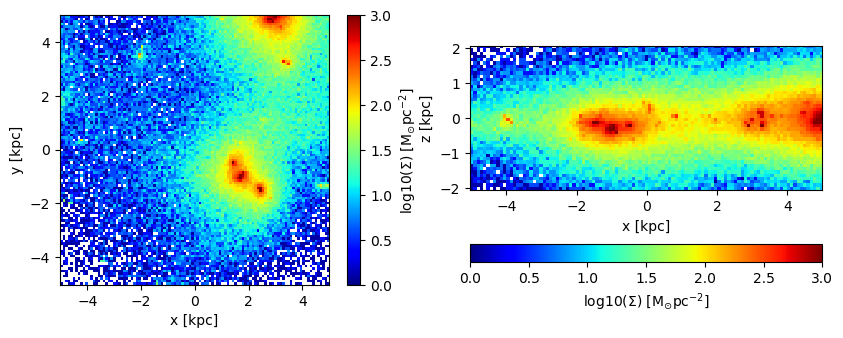

In [27]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);

## Projections of Derived Kinematic Data

#### Use quantities in cartesian coordinates:

Project the following derived data
(mass weighted by default): The absolute value of the velocity :v, the velocity dispersion :σ in different directions and the kinetic energy :ekin. The Julia language supports Unicode characters and can be inserted by e.g. "\sigma + tab-key" leading to: **σ**.

In [7]:
proj_z = projection(particles, [:v, :σ, :σx, :σy, :σz, :ekin], 
                    units=[:km_s,:km_s,:km_s,:km_s,:km_s,:erg], 
                    lmax=9,
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                    center=[24.,24.,24.], range_unit=:kpc);

[Mera]: 2020-02-12T17:53:54.431

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Map data on given lmax: 9
xrange: 150 364
yrange: 150 364
zrange: 235 279
pixel-size: 93.75 [pc]



100%|███████████████████████████████████████████████████| Time: 0:00:02


For the velocity dispersion additional maps are created to created the mass-weighted quantity:
E. g.: σx = sqrt( <vx^2> - < vx >^2 )

In [8]:
proj_z.maps

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 14 entries:
  :ekin => [2.4169e51 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; …
  :sd   => [0.00129258 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0;…
  :v    => [146.277 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; Na…
  :v2   => [4.97588 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; Na…
  :vx   => [1.22376 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; Na…
  :vx2  => [1.49758 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; Na…
  :vy   => [-1.84928 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; N…
  :vy2  => [3.41984 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; Na…
  :vz   => [-0.241781 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; …
  :vz2  => [0.058458 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; N…
  :σ    => [1.90735e-6 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN;…
  :σx   => [0.0 NaN … NaN NaN;

In [9]:
proj_z.maps_unit

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 14 entries:
  :ekin => :erg
  :sd   => :standard
  :v    => :km_s
  :v2   => :standard
  :vx   => :standard
  :vx2  => :standard
  :vy   => :standard
  :vy2  => :standard
  :vz   => :standard
  :vz2  => :standard
  :σ    => :km_s
  :σx   => :km_s
  :σy   => :km_s
  :σz   => :km_s

In [10]:
usedmemory(proj_z);

Memory used: 5.16 MB


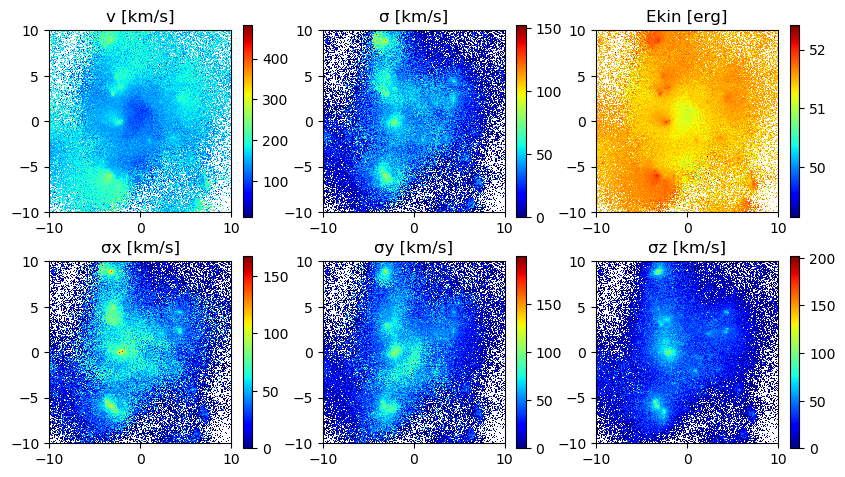

In [11]:
figure(figsize=(10, 5.5))

subplot(2, 3, 1)
title("v [km/s]")
imshow( (permutedims(proj_z.maps[:v])  ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 2)
title("σ [km/s]")
imshow( (permutedims(proj_z.maps[:σ])  ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 3)
title("Ekin [erg]")
imshow( log10.(permutedims(proj_z.maps[:ekin]) ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 4)
title("σx [km/s]")
imshow( (permutedims(proj_z.maps[:σx])   ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 5)
title("σy [km/s]")
imshow( (permutedims(proj_z.maps[:σy])  ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 6)
title("σz [km/s]")
imshow( (permutedims(proj_z.maps[:σz])  ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar();


#### Use quantities in cylindrical coordinates:
#### Face-on disc (z-direction)
For the cylindrical or spherical components of a quantity, the center of the coordinate system is used (keywords: data_center = center default) and can be given with the keyword "data_center" and its units with "data_center_unit". Additionally, the quantities that are based on cartesian coordinates can be given.

In [12]:
proj_z = projection(particles, [:v, :σ, :σx, :σy, :ϕ, :r_cylinder, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder],                    
                    units=[:km_s,:km_s,:km_s, :km_s, :standard, :kpc, :km_s, :km_s, :km_s, :km_s], 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                    center=[:boxcenter], range_unit=:kpc,
                    data_center=[24.,24.,24.], data_center_unit=:kpc); 

[Mera]: 2020-02-12T17:54:21.846

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Map data on given lmax: 9
xrange: 150 364
yrange: 150 364
zrange: 235 279
pixel-size: 93.75 [pc]



100%|███████████████████████████████████████████████████| Time: 0:00:04


In [13]:
proj_z.maps

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 18 entries:
  :r_cylinder   => [14.0096 13.9434 … 14.1205 14.1874; 13.9434 13.877 … 14.0549…
  :sd           => [0.00129258 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … …
  :v            => [146.277 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN…
  :v2           => [4.97588 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN…
  :vr_cylinder  => [29.3132 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN…
  :vr_cylinder2 => [0.199823 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … Na…
  :vx           => [1.22376 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN…
  :vx2          => [1.49758 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN…
  :vy           => [-1.84928 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … Na…
  :vy2          => [3.41984 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN…
  :vϕ_cylinder  => [142.43 NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN …
  :vϕ_cylinder2 => [4.7176 NaN

In [14]:
proj_z.maps_unit

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 18 entries:
  :r_cylinder   => :kpc
  :sd           => :standard
  :v            => :km_s
  :v2           => :standard
  :vr_cylinder  => :km_s
  :vr_cylinder2 => :standard
  :vx           => :standard
  :vx2          => :standard
  :vy           => :standard
  :vy2          => :standard
  :vϕ_cylinder  => :km_s
  :vϕ_cylinder2 => :standard
  :σ            => :km_s
  :σr_cylinder  => :km_s
  :σx           => :km_s
  :σy           => :km_s
  :σϕ_cylinder  => :km_s
  :ϕ            => :radian

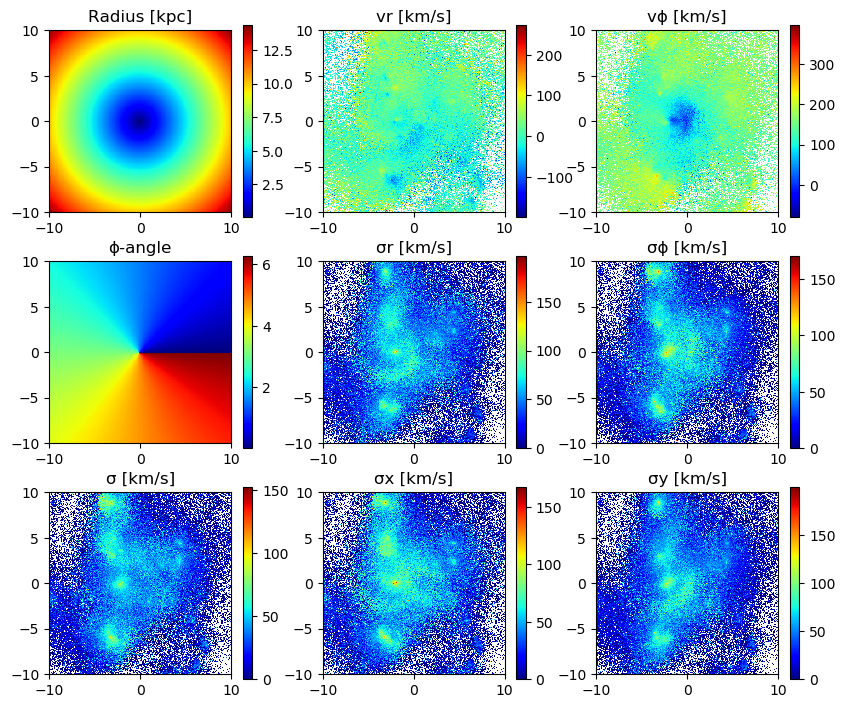

In [15]:
figure(figsize=(10, 8.5))

subplot(3, 3, 1)
title("Radius [kpc]")
imshow( permutedims(proj_z.maps[:r_cylinder]  ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 2)
title("vr [km/s]")
imshow( permutedims(proj_z.maps[:vr_cylinder] ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 3)
title("vϕ [km/s]")
imshow( permutedims(proj_z.maps[:vϕ_cylinder]  ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 4)
title("ϕ-angle")
imshow( (permutedims(proj_z.maps[:ϕ]) ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 5)
title("σr [km/s]")
imshow( permutedims(proj_z.maps[:σr_cylinder]  ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 6)
title("σϕ [km/s]")
imshow( permutedims(proj_z.maps[:σϕ_cylinder] ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 7)
title("σ [km/s]")
imshow( (permutedims(proj_z.maps[:σ]) ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 8)
title("σx [km/s]")
imshow( permutedims(proj_z.maps[:σx]  ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 9)
title("σy [km/s]")
imshow( permutedims(proj_z.maps[:σy] ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar();

## Project on a Coarser Grid

The default is the projection on the maximum loaded grid level (always provided in the output). Choose a smaller level with the keyword *lmax* to project on a coarser grid in addition. Higher-resolution data is averaged within each coarser grid-cell (default: mass-weighted). By default, the data is assumed to be in the center of the simulation box.

In [47]:
proj_z = projection(particles, 
                    [:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder], 
                    :km_s, 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.],
                    center=[:boxcenter], range_unit=:kpc,
                    lmax=8); 

[Mera]: 2020-02-12T17:12:19.951

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Map data on given lmax: 8
xrange: 75 183
yrange: 75 183
zrange: 118 140
pixel-size: 187.5 [pc]



100%|███████████████████████████████████████████████████| Time: 0:00:01


The projection onto the maximum loaded grid is always provided:

In [48]:
proj_z.maps

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 19 entries:
  :sd           => [0.000323146 0.000323146 … 0.000323146 0.0; 0.00129258 0.000…
  :v            => [146.277 156.41 … 175.633 NaN; 169.254 166.428 … NaN 180.403…
  :v2           => [4.97588 5.6892 … 7.17355 NaN; 6.6775 6.4413 … NaN 7.56845; …
  :vr_cylinder  => [29.3132 76.3408 … -35.325 NaN; 51.6525 6.80341 … NaN 21.812…
  :vr_cylinder2 => [0.199823 1.35529 … 0.290192 NaN; 1.12895 0.010764 … NaN 0.1…
  :vx           => [1.22376 0.610176 … -1.49337 NaN; 1.08828 1.69991 … NaN -2.2…
  :vx2          => [1.49758 0.372314 … 2.23015 NaN; 1.75569 2.88971 … NaN 4.880…
  :vy           => [-1.84928 -2.29076 … -2.22139 NaN; -2.175 -1.86716 … NaN -1.…
  :vy2          => [3.41984 5.24756 … 4.93456 NaN; 4.80077 3.48629 … NaN 2.6615…
  :vz           => [-0.241781 -0.263284 … -0.0940292 NaN; -0.245381 0.25555 … N…
  :vz2          => [0.058458 0.0693187 … 0.00884149 NaN; 0.121036 0.0653057 … N…
  :vϕ_cylinder  => [142.43 135

In [49]:
proj_z.maps_unit

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 19 entries:
  :sd           => :standard
  :v            => :km_s
  :v2           => :standard
  :vr_cylinder  => :km_s
  :vr_cylinder2 => :standard
  :vx           => :standard
  :vx2          => :standard
  :vy           => :standard
  :vy2          => :standard
  :vz           => :standard
  :vz2          => :standard
  :vϕ_cylinder  => :km_s
  :vϕ_cylinder2 => :standard
  :σ            => :km_s
  :σr_cylinder  => :km_s
  :σx           => :km_s
  :σy           => :km_s
  :σz           => :km_s
  :σϕ_cylinder  => :km_s

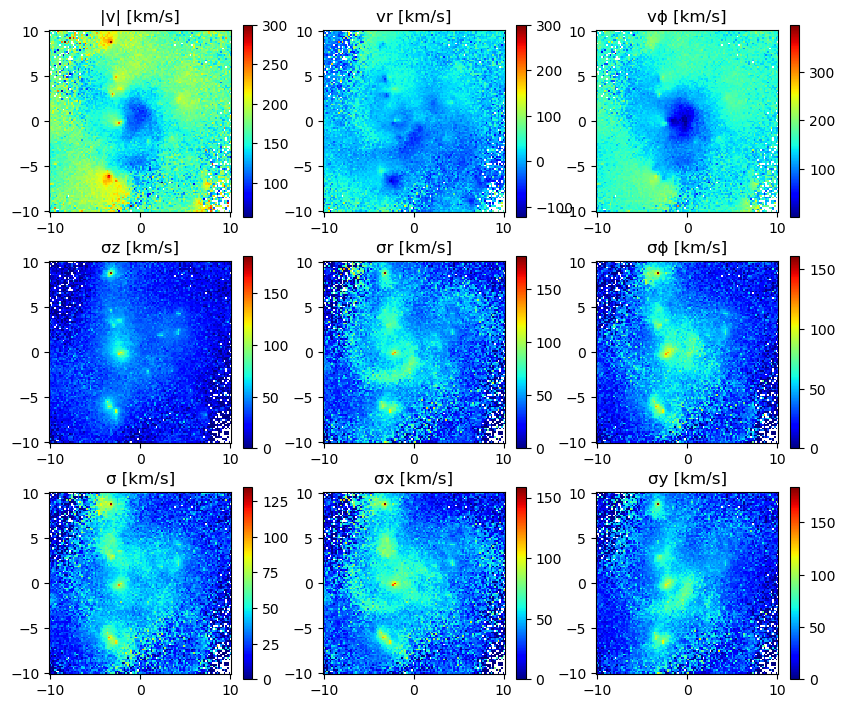

In [50]:
figure(figsize=(10, 8.5))

subplot(3, 3, 1)
title("|v| [km/s]")
imshow( permutedims(proj_z.maps[:v]  ), cmap="jet", origin="lower", extent=proj_z.cextent, vmax=300.)
colorbar()


subplot(3, 3, 2)
title("vr [km/s]")
imshow( permutedims(proj_z.maps[:vr_cylinder] ), cmap="jet", origin="lower", extent=proj_z.cextent, vmax=300.)
colorbar()


subplot(3, 3, 3)
title("vϕ [km/s]")
imshow( permutedims(proj_z.maps[:vϕ_cylinder]  ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 4)
title("σz [km/s]")
imshow( (permutedims(proj_z.maps[:σz]) ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 5)
title("σr [km/s]")
imshow( (permutedims(proj_z.maps[:σr_cylinder]  )), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 6)
title("σϕ [km/s]")
imshow( (permutedims(proj_z.maps[:σϕ_cylinder] )), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 7)
title("σ [km/s]")
imshow( (permutedims(proj_z.maps[:σ]) ), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 8)
title("σx [km/s]")
imshow( (permutedims(proj_z.maps[:σx]  )), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 9)
title("σy [km/s]")
imshow( (permutedims(proj_z.maps[:σy] )), cmap="jet", origin="lower", extent=proj_z.cextent)
colorbar();

## Remap a Projected Data onto a Coarser Grid

Pass the object with the projected data to the function *remap* and the level of the coarser grid:

In [51]:
proj_zlmax = remap(proj_z, 6, weighting=:mass);


remap from:
level 8 => 6
cellsize 187.5 [pc] => 750.0 [pc]
pixels (108, 108) => (27, 27)


In [52]:
proj_zlmax.maps_lmax

DataStructures.SortedDict{Any,Any,Base.Order.ForwardOrdering} with 19 entries:
  :sd           => [0.000323146 0.000969439 … 0.000969439 0.0; 0.000323146 0.00…
  :v            => [146.277 168.687 … 156.122 NaN; 139.301 149.861 … 163.056 Na…
  :v2           => [4.97588 6.62245 … 5.72437 NaN; 4.51262 5.49687 … 6.34405 Na…
  :vr_cylinder  => [29.3132 93.8512 … 12.6568 NaN; -65.7457 6.47188 … -13.4105 …
  :vr_cylinder2 => [0.199823 2.10548 … 1.15359 NaN; 1.0052 0.118218 … 0.295219 …
  :vx           => [1.22376 0.338848 … -1.53257 NaN; 2.0553 1.49252 … -1.57894 …
  :vx2          => [1.49758 0.16636 … 2.51795 NaN; 4.22424 2.43083 … 2.92281 Na…
  :vy           => [-1.84928 -2.4731 … -1.35159 NaN; -0.536675 -1.63 … -1.83938…
  :vy2          => [3.41984 6.13228 … 3.07412 NaN; 0.28802 2.82914 … 3.41524 Na…
  :vz           => [-0.241781 -0.527716 … -0.170057 NaN; -0.0189591 -0.318119 ……
  :vz2          => [0.058458 0.323811 … 0.132298 NaN; 0.000359447 0.2369 … 0.00…
  :vϕ_cylinder  => [142.43 134

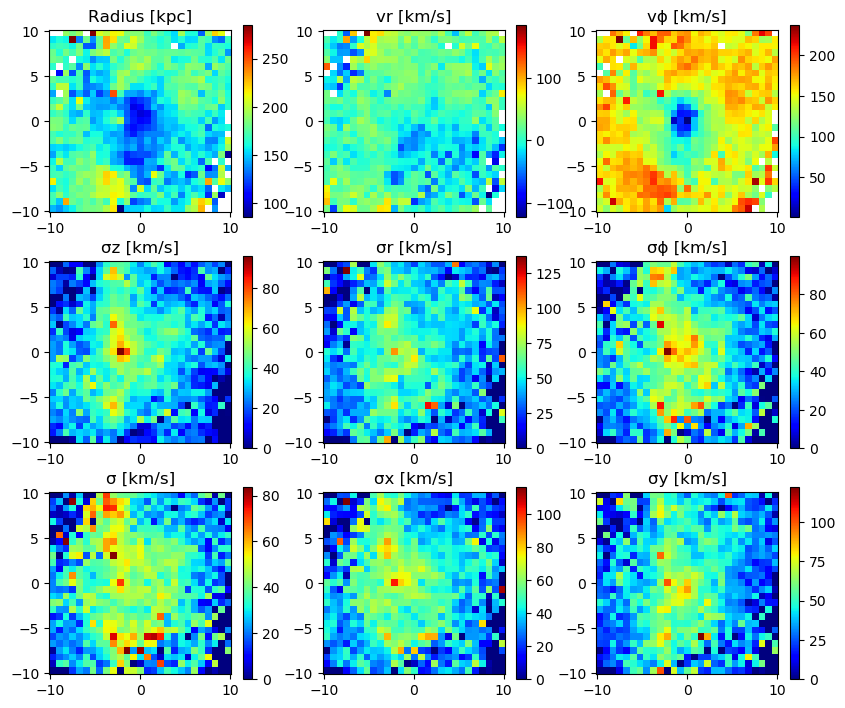

In [54]:
figure(figsize=(10, 8.5))

subplot(3, 3, 1)
title("Radius [kpc]")
imshow( permutedims(proj_zlmax.maps_lmax[:v]  ), cmap="jet", origin="lower", extent=proj_zlmax.cextent)
colorbar()


subplot(3, 3, 2)
title("vr [km/s]")
imshow( permutedims(proj_zlmax.maps_lmax[:vr_cylinder] ), cmap="jet", origin="lower", extent=proj_zlmax.cextent)
colorbar()


subplot(3, 3, 3)
title("vϕ [km/s]")
imshow( permutedims(proj_zlmax.maps_lmax[:vϕ_cylinder]  ), cmap="jet", origin="lower", extent=proj_zlmax.cextent)
colorbar()



subplot(3, 3, 4)
title("σz [km/s]")
imshow( permutedims(proj_zlmax.maps_lmax[:σz]) , cmap="jet", origin="lower", extent=proj_zlmax.cextent)
colorbar()



subplot(3, 3, 5)
title("σr [km/s]")
imshow( permutedims(proj_zlmax.maps_lmax[:σr_cylinder] ), cmap="jet", origin="lower", extent=proj_zlmax.cextent)
colorbar()


subplot(3, 3, 6)
title("σϕ [km/s]")
imshow( permutedims(proj_zlmax.maps_lmax[:σϕ_cylinder] ), cmap="jet", origin="lower", extent=proj_zlmax.cextent)
colorbar()



subplot(3, 3, 7)
title("σ [km/s]")
imshow( permutedims(proj_zlmax.maps_lmax[:σ]) , cmap="jet", origin="lower", extent=proj_zlmax.cextent)
colorbar()



subplot(3, 3, 8)
title("σx [km/s]")
imshow( permutedims(proj_zlmax.maps_lmax[:σx]), cmap="jet", origin="lower", extent=proj_zlmax.cextent)
colorbar()


subplot(3, 3, 9)
title("σy [km/s]")
imshow( permutedims(proj_zlmax.maps_lmax[:σy] ), cmap="jet", origin="lower", extent=proj_zlmax.cextent)
colorbar();

## Projection of the Birth/Age-Time

Project the average birth-time of the particles to the grid:

In [55]:
proj_z = projection(particles, :birth, :Myr,
                    lmax=6,  zrange=[0.45,0.55], verbose=false); 
proj_x = projection(particles, :birth, :Myr,
                    lmax=6,  zrange=[0.45,0.55], direction=:x, verbose=false); 

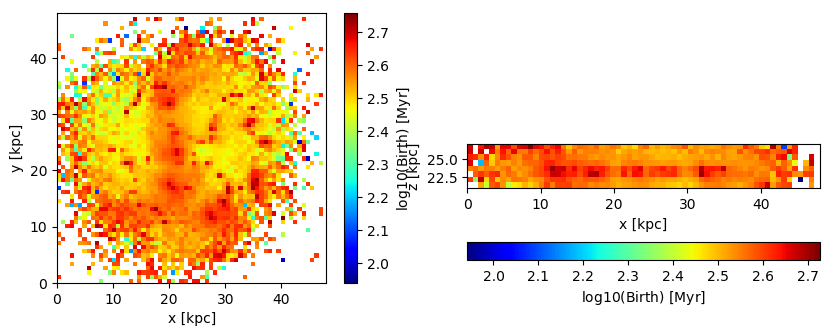

In [56]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:birth])), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Birth) \ [Myr]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:birth])), cmap="jet", origin="lower", extent=proj_x.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Birth) \ [Myr]}",orientation="horizontal", pad=0.2);

Project the average age of the particles to the grid. The age is taken relative to the loaded snapshot time by default.

In [57]:
proj_z = projection(particles, :age, :Myr,
                    lmax=6,  zrange=[0.45,0.55], verbose=false); 
proj_x = projection(particles, :age, :Myr,
                    lmax=6,  zrange=[0.45,0.55], direction=:x, verbose=false); 

The reference time (code units) for the age calculation:

In [58]:
proj_z.ref_time

39.9019537349027

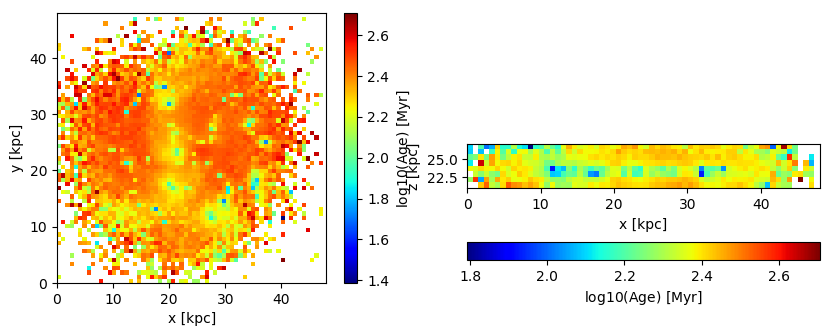

In [59]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:age])), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Age) \ [Myr]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:age])), cmap="jet", origin="lower", extent=proj_x.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Age) \ [Myr]}",orientation="horizontal", pad=0.2);

Project the average age of the particles relative to a given reference time:

In [24]:
proj_z = projection(particles, :age, :Myr, ref_time=0.,
                    lmax=6,  zrange=[0.45,0.55], verbose=false); 
proj_x = projection(particles, :age, :Myr, ref_time = 0.,
                    lmax=6,  zrange=[0.45,0.55], direction=:x, verbose=false); 

The reference time (code units) for the age calculation:

In [25]:
proj_z.ref_time

0.0

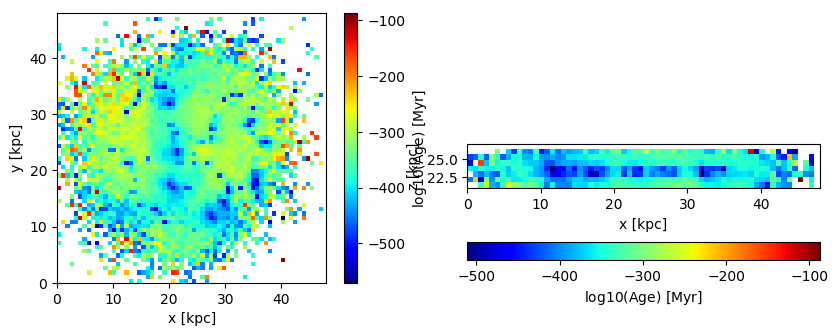

In [26]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( ( permutedims(proj_z.maps[:age])), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Age) \ [Myr]}")

subplot(1,2,2)
im = imshow( ( permutedims(proj_x.maps[:age])), cmap="jet", origin="lower", extent=proj_x.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Age) \ [Myr]}",orientation="horizontal", pad=0.2);

## Projection of Masked Data

Mask particles with ages higher than 500 Myr by creating a Bool-array where the smaller ages correspond to false entries:

In [27]:
mask = getvar(particles, :age, :Myr) .> 500. ;

In [32]:
proj_z = projection(particles, :age, :Myr, mask=mask,
                    lmax=6,  zrange=[0.45,0.55]); 
proj_x = projection(particles, :age, :Myr, mask=mask,
                    lmax=6,  zrange=[0.45,0.55], direction=:x); 

[Mera]: 2020-02-12T17:59:05.491

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Map data on given lmax: 6
xrange: 1 65
yrange: 1 65
zrange: 29 37
pixel-size: 750.0 [pc]

:mask provided by function

[Mera]: 2020-02-12T17:59:09.182

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Map data on given lmax: 6
xrange: 1 65
yrange: 1 65
zrange: 29 37
pixel-size: 750.0 [pc]

:mask provided by function



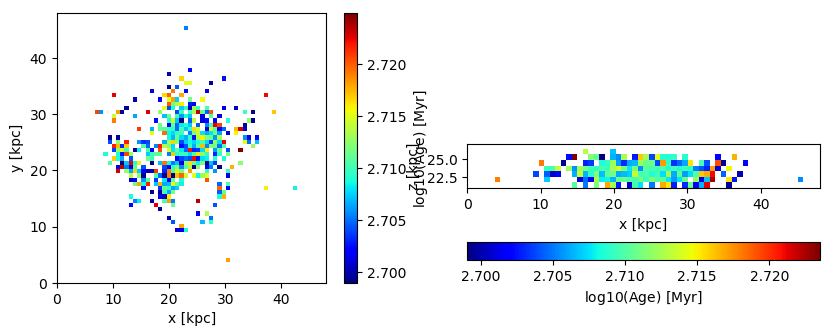

In [33]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:age])), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Age) \ [Myr]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:age])), cmap="jet", origin="lower", extent=proj_x.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Age) \ [Myr]}",orientation="horizontal", pad=0.2);